# Ensembles
---------------------------------

This example shows how to use atom's ensemble techniques to improve predictions on a dataset combining several models.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [17]:
# Import packages
from sklearn.datasets import load_breast_cancer
from atom import ATOMClassifier

In [18]:
# Load the data
X, y = load_breast_cancer(return_X_y=True)

## Run the pipeline

In [19]:
# Initialize atom and train several models
atom = ATOMClassifier(X, y, verbose=2, random_state=1)
atom.run(models=["LR", "Tree", "LGB"], metric="accuracy")

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ====================== >>
Shape: (569, 31)
Scaled: False
Outlier values: 174 (1.2%)
---------------------------------------
Train set size: 456
Test set size: 113
---------------------------------------
|    | dataset   | train     | test     |
|---:|:----------|:----------|:---------|
|  0 | 212 (1.0) | 167 (1.0) | 45 (1.0) |
|  1 | 357 (1.7) | 289 (1.7) | 68 (1.5) |


Training ===================================== >>
Models: LR, Tree, LGB
Metric: accuracy


Results for Logistic Regression:         
Fit ---------------------------------------------
Train evaluation --> accuracy: 0.9912
Test evaluation --> accuracy: 0.9646
Time elapsed: 0.024s
-------------------------------------------------
Total time: 0.024s


Results for Decision Tree:         
Fit ---------------------------------------------
Train evaluation --> accuracy: 1.0
Test evaluation --> accuracy: 0.9469
Time elapsed: 0.

## Voting

In [20]:
# Combine the models into a Voting model
atom.voting()

Voting added to the models!


In [21]:
# Note that we now have an extra model in the pipeline
atom.models

['LR', 'Tree', 'LGB', 'Vote']

In [22]:
# The Vote model averages the scores of the models it contains
atom.vote

Voting
 --> Models: ['LR', 'Tree', 'LGB']
 --> Weights: None
 --> Evaluation: accuracy: 0.9617

In [23]:
# We can use it like any other model to make predictions or plots
atom.vote.predict_proba_test[:10]

array([[4.19991299e-01, 5.80008701e-01],
       [6.48864108e-05, 9.99935114e-01],
       [4.27978923e-05, 9.99957202e-01],
       [9.99989219e-01, 1.07807315e-05],
       [3.05053115e-03, 9.96949469e-01],
       [9.98028247e-01, 1.97175259e-03],
       [3.49327649e-03, 9.96506724e-01],
       [2.49145998e-04, 9.99750854e-01],
       [2.43109249e-05, 9.99975689e-01],
       [3.27725335e-04, 9.99672275e-01]])

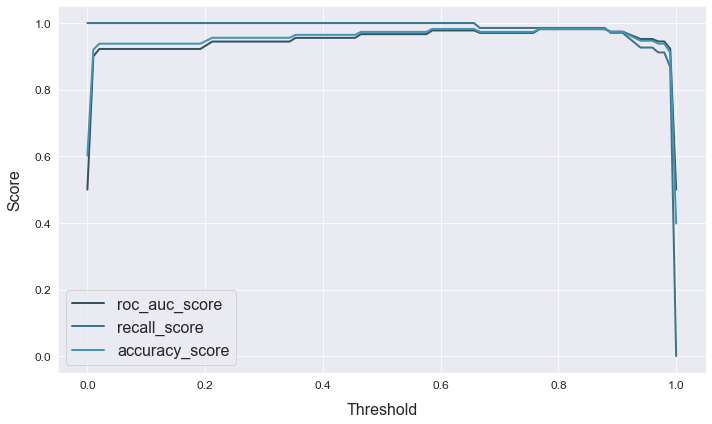

In [26]:
atom.vote.plot_threshold(metric=["auc", "recall", "accuracy"])

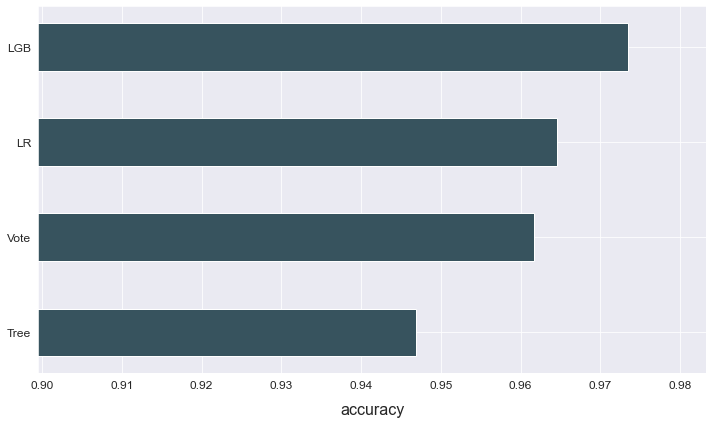

In [9]:
atom.plot_results()

In [10]:
atom.vote.delete()

Model deleted successfully!


## Stacking

In [11]:
# Just like Voting, we can create a Stacking model
atom.stacking(estimator="LDA")

Stacking added to the models!


In [12]:
# The final estimator uses the predictions of the underlying models
atom.stack.head()

,predict_proba_LR,predict_proba_Tree,predict_proba_LGB,Target
0,0.944629,1.0,0.998580,1
1,0.006326,0.0,0.000161,0
2,0.992223,1.0,0.999963,1
3,0.003557,0.0,0.001161,0
4,0.047350,0.0,0.004474,0


In [13]:
# Again, the model can be used for predictions or plots
atom.stack.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

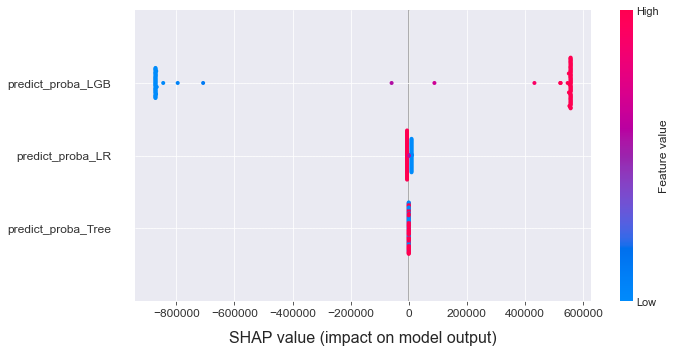

In [14]:
atom.stack.beeswarm_plot()